In [ ]:
import torch
# Load checkpoint.
print('==> Resuming from checkpoint..')
checkpoint = torch.load('./checkpoint/ckpt.pth')
# net.load_state_dict(checkpoint['net'])
# best_acc = checkpoint['acc']
# start_epoch = checkpoint['epoch']

==> Resuming from checkpoint..


In [6]:
checkpoint['acc']

95.56

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Tensor shape: torch.Size([1, 3, 32, 32])
Label: 6


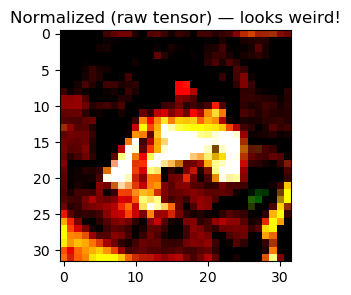

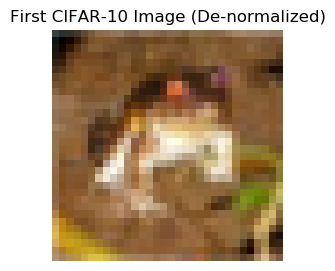

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 normalization constants
mean = (0.4914, 0.4822, 0.4465)
std  = (0.2023, 0.1994, 0.2010)

# Transform for test (no data augmentation)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

# Load dataset
testset = torchvision.datasets.CIFAR10(root='~/data', train=True, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

# Get the first image and label
dataiter = iter(testloader)
images, labels = next(dataiter)

print("Tensor shape:", images.shape)
print("Label:", labels.item())

# Show normalized image (it will look odd)
plt.figure(figsize=(3,3))
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.title("Normalized (raw tensor) — looks weird!")
plt.show()

# ---- De-normalize for visualization ----
def denormalize(img_tensor, mean, std):
    img = img_tensor.clone()
    for c in range(3):
        img[c] = img[c] * std[c] + mean[c]
    return img

img_denorm = denormalize(images[0], mean, std)

# Convert to NumPy and show properly
npimg = np.transpose(img_denorm.numpy(), (1, 2, 0))
plt.figure(figsize=(3,3))
plt.imshow(np.clip(npimg, 0, 1))
plt.title("First CIFAR-10 Image (De-normalized)")
plt.axis('off')
plt.show()
